In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

from keras.models import load_model
from commonfun import apply_mask_overlay, create_dataset



AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [9]:
model = load_model('unet_best_complite.keras')

In [10]:
test_df = pd.read_csv('./CamVid/test.txt', header=None, sep=' ')
test_df.columns = ['image', 'mask']
test_df

,image,mask
0,/SegNet/CamVid/test/0001TP_008550.png,/SegNet/CamVid/testannot/0001TP_008550.png
1,/SegNet/CamVid/test/0001TP_008580.png,/SegNet/CamVid/testannot/0001TP_008580.png
2,/SegNet/CamVid/test/0001TP_008610.png,/SegNet/CamVid/testannot/0001TP_008610.png
3,/SegNet/CamVid/test/0001TP_008640.png,/SegNet/CamVid/testannot/0001TP_008640.png
4,/SegNet/CamVid/test/0001TP_008670.png,/SegNet/CamVid/testannot/0001TP_008670.png
...,...,...
228,/SegNet/CamVid/test/Seq05VD_f04980.png,/SegNet/CamVid/testannot/Seq05VD_f04980.png
229,/SegNet/CamVid/test/Seq05VD_f05010.png,/SegNet/CamVid/testannot/Seq05VD_f05010.png
230,/SegNet/CamVid/test/Seq05VD_f05040.png,/SegNet/CamVid/testannot/Seq05VD_f05040.png
231,/SegNet/CamVid/test/Seq05VD_f05070.png,/SegNet/CamVid/testannot/Seq05VD_f05070.png


In [11]:
test_image_paths = test_df['image'].str.replace('/SegNet', '.').values.tolist()
test_mask_paths = test_df['mask'].str.replace('/SegNet', '.').values.tolist()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


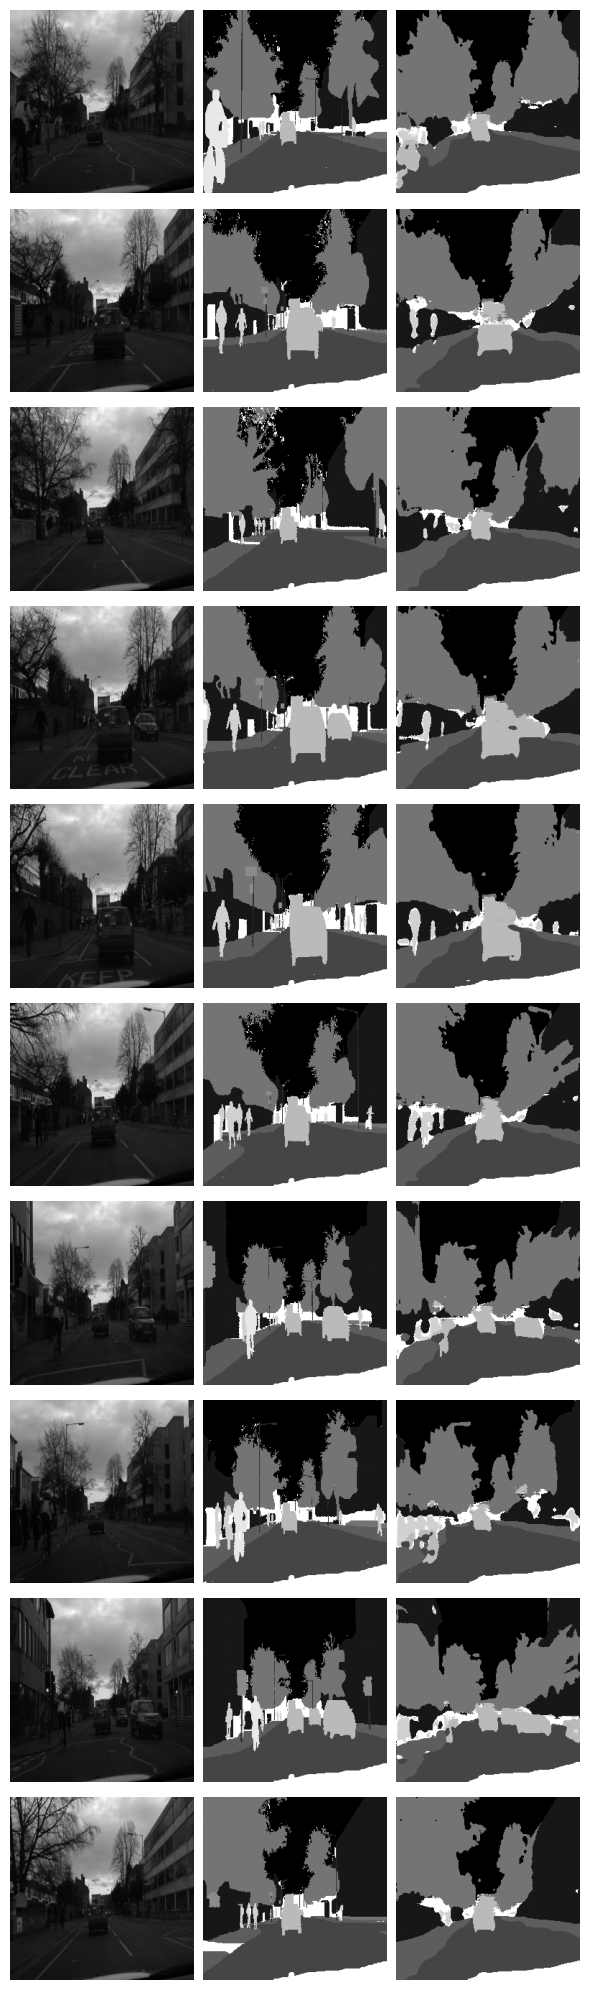

In [30]:
test_ds = create_dataset(test_image_paths[:10], test_mask_paths[:10])
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(6, 2*n))
for images, masks in test_ds.take(1):
    for i in range(n):
        plt.subplot(n, 3, i*3+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.subplot(n, 3, i*3+2)
        plt.imshow(masks[i], cmap='gray')
        plt.axis('off')
        
        predictions = model.predict((images[i])[np.newaxis, :])
        pred = np.argmax(predictions[0], axis=-1)

        plt.subplot(n, 3, i*3+3)
        plt.imshow(pred, cmap='gray')
        plt.axis('off')
        
plt.tight_layout()
plt.show();

In [32]:
loss, acc = model.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.7970 - loss: 0.5970


In [33]:
print('loss : ', loss, ', acc : ', acc)

loss :  0.5969592928886414 , acc :  0.7970077395439148


<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.int32, name=None))>